In [4]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libice6 libpthread-stubs0-dev libx11-6 libx11-data libx11-dev libx11-doc
  libxau-dev libxau6 libxcb1 libxcb1-dev libxdmcp-dev libxdmcp6 libxrender1
  x11-common x11proto-core-dev x11proto-input-dev x11proto-kb-dev
  x11proto-render-dev xorg-sgml-doctools xtrans-dev
Suggested packages:
  libxcb-doc
The following NEW packages will be installed:
  libice6 libpthread-stubs0-dev libsm6 libx11-6 libx11-data libx11-dev
  libx11-doc libxau-dev libxau6 libxcb1 libxcb1-dev libxdmcp-dev libxdmcp6
  libxext6 libxrender-dev libxrender1 x11-common x11proto-core-dev
  x11proto-input-dev x11proto-kb-dev x11proto-render-dev xorg-sgml-doctools
  xtrans-dev
0 upgraded, 23 newly installed, 0 to remove and 11 not upgraded.
Need to get 3817 kB of archives.
After this operation, 21.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ub

invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libice6:amd64 (2:1.0.9-1) ...
Setting up libsm6:amd64 (2:1.2.2-1) ...
Setting up libpthread-stubs0-dev:amd64 (0.3-4) ...
Setting up xorg-sgml-doctools (1:1.11-1) ...
Setting up x11proto-core-dev (7.0.31-1~ubuntu16.04.2) ...
Setting up libxau-dev:amd64 (1:1.0.8-1) ...
Setting up libxdmcp-dev:amd64 (1:1.1.2-1.1) ...
Setting up x11proto-input-dev (2.3.1-1) ...
Setting up x11proto-kb-dev (1.0.7-0ubuntu1) ...
Setting up xtrans-dev (1.3.5-1) ...
Setting up libxcb1-dev:amd64 (1.11.1-1ubuntu1) ...
Setting up libx11-dev:amd64 (2:1.6.3-1ubuntu2.1) ...
Setting up libx11-doc (2:1.6.3-1ubuntu2.1) ...
Setting up libxrender1:amd64 (1:0.9.9-0ubuntu1) ...
Setting up x11proto-render-dev (2:0.11.1-2) ...
Setting up libxrender-dev:amd64 (1:0.9.9-0ubuntu1) ...
Processing triggers for libc-bin (2.23-0ubuntu10) ...
Processing triggers for systemd (229-4ubuntu21.4) ...
You are using pip version 18.

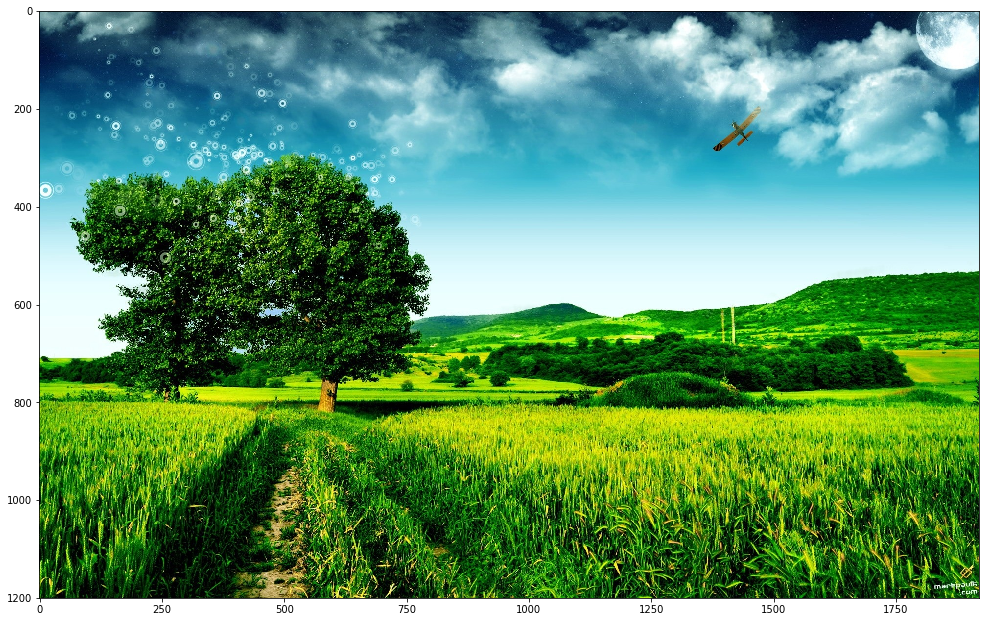

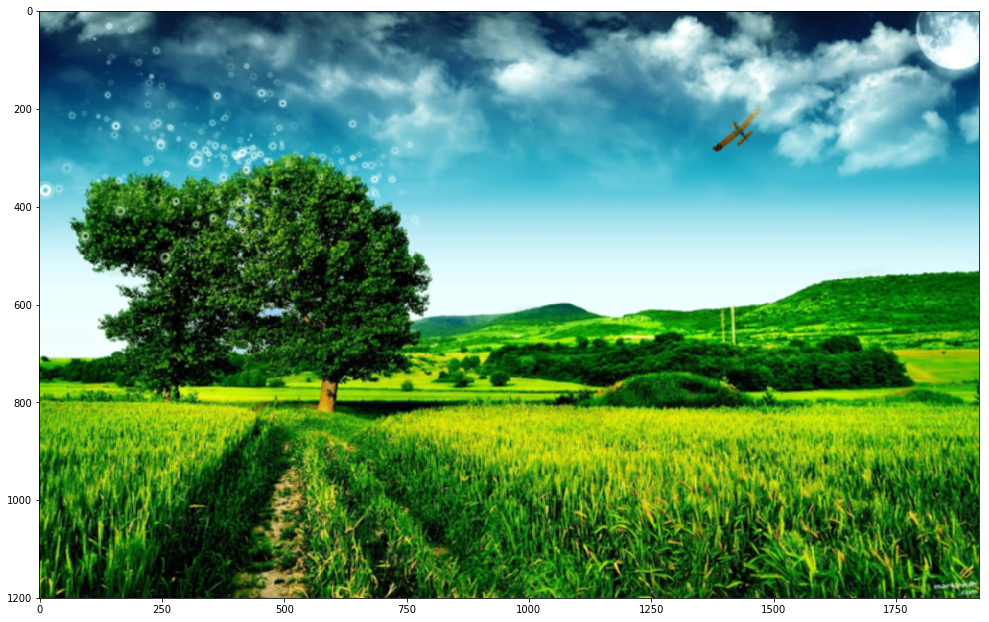

In [6]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

img = cv2.imread("blur_source.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(19.2, 10.8))
plt.imshow(img)

blur_img = cv2.blur(img, (5,5))

plt.figure(figsize=(19.2, 10.8))
plt.imshow(blur_img)

In [63]:
from tensorflow import keras

input_shape = img.shape

print(input_shape)

input_layer = keras.layers.Input(img.shape)
output_layer = keras.layers.Lambda(lambda x: x)(input_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

out_img = model.predict(img.reshape((-1, 1200, 1920, 3)))

(1200, 1920, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 1200, 1920, 3)     0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 1200, 1920, 3)     0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


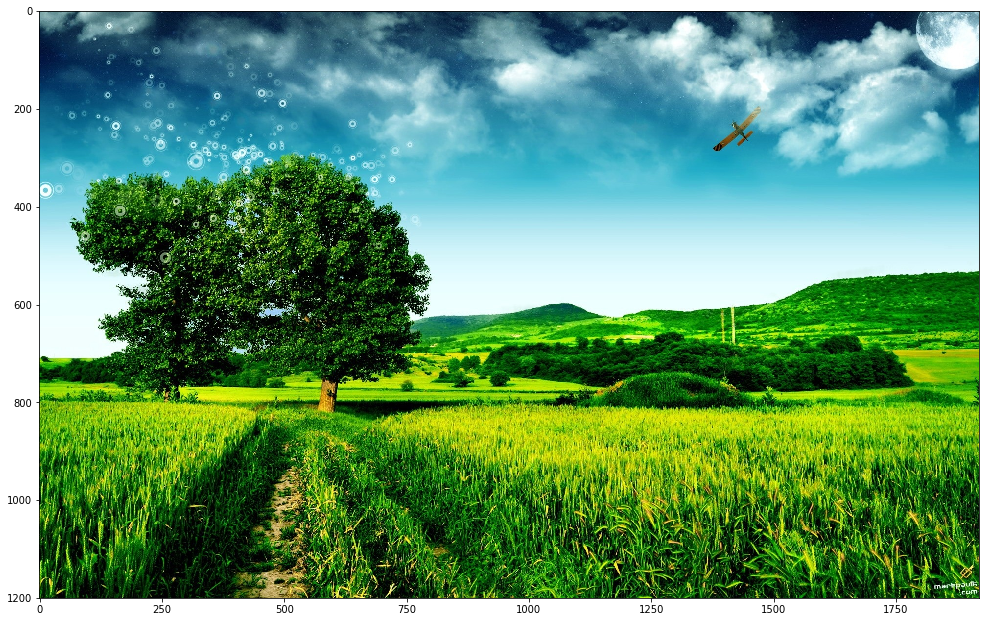

In [28]:
import numpy as np

plt.figure(figsize=(19.2, 10.8))
plt.imshow(out_img.astype(np.uint8).reshape(1200, 1920, 3))

In [39]:

input_r = keras.layers.Input((1200, 1920, 1))
input_g = keras.layers.Input((1200, 1920, 1))
input_b = keras.layers.Input((1200, 1920, 1))

blur_r = keras.layers.Conv2D(1, (5, 5), kernel_initializer=keras.initializers.Constant(value=1/25), padding='same')(input_r)
blur_g = keras.layers.Conv2D(1, (5, 5), kernel_initializer=keras.initializers.Constant(value=1/25), padding='same')(input_g)
blur_b = keras.layers.Conv2D(1, (5, 5), kernel_initializer=keras.initializers.Constant(value=1/25), padding='same')(input_b)

merge_rgb = keras.layers.Concatenate(axis=-1)([blur_r, blur_g, blur_b])

blur_model = keras.models.Model(inputs=[input_r,input_g,input_b], outputs=merge_rgb)


In [67]:
blur_img = blur_model.predict(
    [img[:, :, 0].reshape(-1, 1200, 1920, 1), 
     img[:, :, 1].reshape(-1, 1200, 1920, 1), 
     img[:, :, 2].reshape(-1, 1200, 1920, 1)]
).astype(np.uint8)

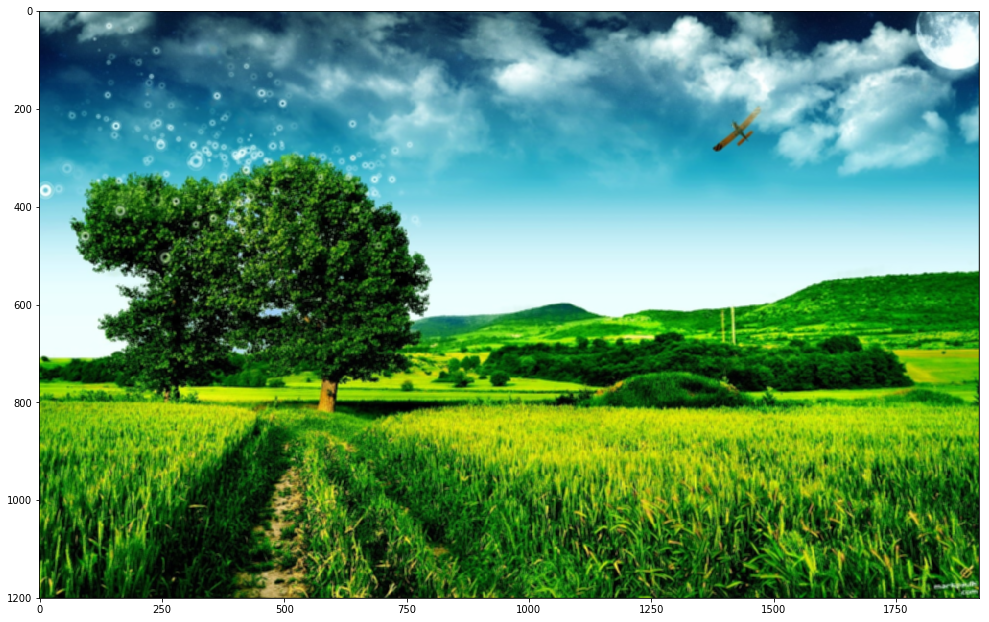

In [68]:
plt.figure(figsize=(19.2, 10.8))
plt.imshow(blur_imgg.reshape(1200, 1920, 3))

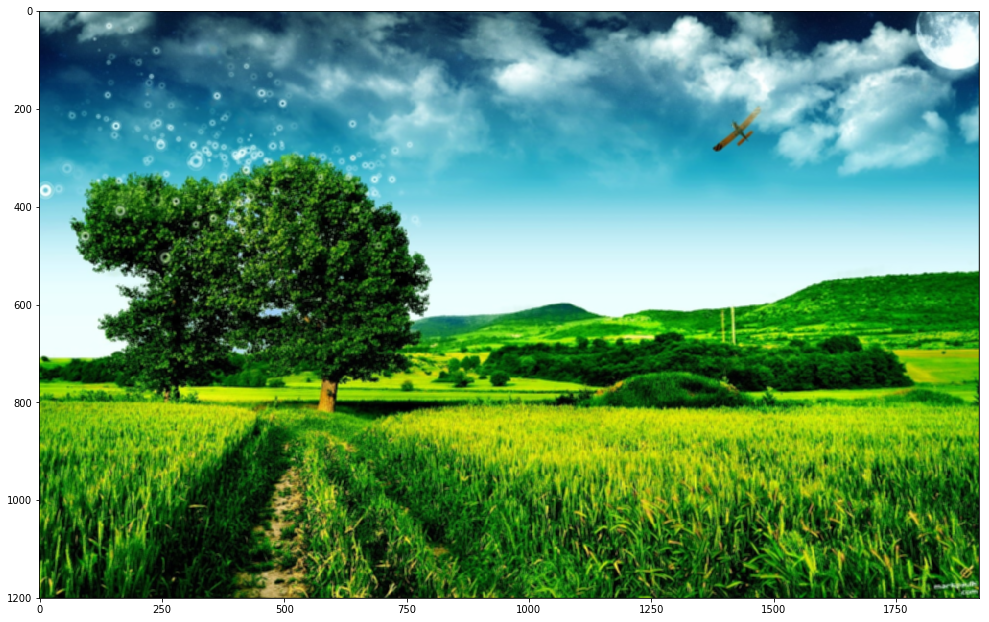

In [66]:
combined_layer = model(blur_model.output)
combined_model = keras.models.Model(inputs=[input_r,input_g,input_b], outputs=[combined_layer])

combined_out = combined_model.predict([img[:, :, 0].reshape(-1, 1200, 1920, 1), img[:, :, 1].reshape(-1, 1200, 1920, 1), img[:, :, 2].reshape(-1, 1200, 1920, 1)])
combined_img = combined_out.astype(np.uint8)

plt.figure(figsize=(19.2, 10.8))
plt.imshow(combined_img.reshape(1200, 1920, 3))